In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data_utils
from torchnlp.nn import Attention
from torch.nn.utils import clip_grad_norm_
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence, pad_sequence
from tqdm import tqdm
import os

In [5]:
os.listdir()

['StarLightCurves_TEST.tsv',
 'StarLightCurves_TRAIN.tsv',
 'desktop.ini',
 'README.md',
 'Untitled.ipynb',
 '.ipynb_checkpoints',
 'autoencoder.py']

In [6]:
f = os.listdir()[1]

In [17]:
data = pd.read_csv(f, delimiter='\t', header=None)

In [27]:
x = data.drop(0, axis=1)
y = data[0]

### Dataset

In [46]:
class TSDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = torch.Tensor(data.astype(np.float32))

    def __getitem__(self, i):
        item = self.data[i]
        return item
    
    def __len__(self):
        return len(self.data)

In [47]:
train_x = x.iloc[:950].values
cv_x = x.iloc[950:].values

In [48]:
train_ds = TSDataset(train_x)
cv_ds = TSDataset(cv_x)

### Loading

In [49]:
from torch.utils.data import DataLoader

In [50]:
train_loader = DataLoader(train_ds, batch_size=50, shuffle=True)
cv_loader = DataLoader(cv_ds, batch_size=50, shuffle=True)

In [69]:
torch.save(train_loader, 'train_loader.pt')
torch.save(cv_loader, 'cv_loader.pt')

In [51]:
a = next(iter(train_loader))

In [58]:
pd.DataFrame(train_x.iloc[0])

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [67]:
plt_x = x.iloc[800]

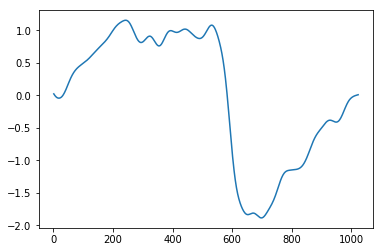

In [68]:
sns.lineplot(data=plt_x)